In [1]:
import matplotlib.pyplot as plt
import json
import seaborn as sns

def plot_approach_vs_score_from_jsonl(jsonl_path):
    """
    Reads a JSONL file, assigns sequential approach numbers (starting at 1) to each solution,
    and plots a modern scatter plot of approach index vs total score with a clean style.

    Args:
        jsonl_path (str): Path to the JSONL file.
    """
    x_vals = []  # Sequential approach index
    y_vals = []  # Total scores

    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data = json.loads(line)
                solutions = data.get("all_solutions_list", [])
                for idx, solution in enumerate(solutions, start=1):
                    score = solution.get("total_score")
                    if score is not None:
                        x_vals.append(idx)
                        y_vals.append(score)
            except json.JSONDecodeError:
                print("Skipping malformed line.")

    # Modern style
    sns.set(style="whitegrid", rc={"axes.facecolor": "white", "grid.color": "white"})
    plt.figure(figsize=(10, 6))
    plt.style.use("seaborn-v0_8-white")  # Minimalist style

    # Scatter plot with aesthetic markers
    plt.scatter(
        x_vals,
        y_vals,
        color="#1f77b4",
        s=80,
        alpha=0.9,
        edgecolors='white',
        linewidths=0.5
    )

    # Labels and title
    plt.xlabel("Approach Number", fontsize=14)
    plt.ylabel("Total Score", fontsize=14)
    plt.title("Approach vs Total Score", fontsize=16, weight='bold')

    # X-axis ticks incrementing by 1
    if x_vals:
        plt.xticks(range(1, max(x_vals) + 1), fontsize=12)
    plt.yticks(fontsize=12)

    # Remove top/right spines for a modern look
    sns.despine()

    plt.tight_layout()
    plt.show()

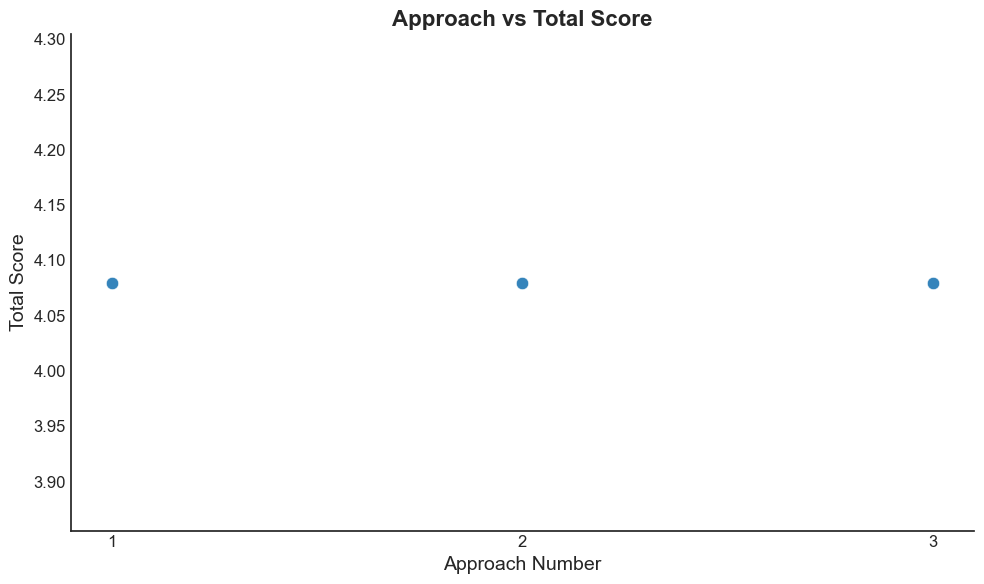

In [2]:
plot_approach_vs_score_from_jsonl("../../output.jsonl")